<div style=" background-color: RGB(173, 40, 59);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec R ou Python
</h2>
</div>

<div style="background-color: RGB(173, 40, 59);" >
<h2 style="margin: auto; padding: 20px; color: #fff ">Partie 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Librairies utilisées pour le calcul
import pandas as pd
import numpy as np

#Librairies utilisées pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy.stats import zscore

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier Fichier_erp.xlsx
df_erp = pd.read_excel(r'C:\Users\steph\Desktop\Openclassrooms\Data Analyst\P5\01 - Ressources\Fichier_erp.xlsx')

#Importation du fichier Fichier_web.xlsx
df_web = pd.read_excel(r'C:\Users\steph\Desktop\Openclassrooms\Data Analyst\P5\01 - Ressources\Fichier_web.xlsx')

#Importation du fichier Fichier_liaison.xlsx
df_liaison = pd.read_excel(r'C:\Users\steph\Desktop\Openclassrooms\Data Analyst\P5\01 - Ressources\Fichier_liaison.xlsx')

C:\Users\steph\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\steph\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\steph\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(173, 40, 59);" >
<h2 style="margin: auto; padding: 20px; color: #fff;">Partie 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">2.1 - Analyse exploratoire du fichier erp</h3>
</div>

In [3]:
#Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [4]:
#Consultation du nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
#Affichage des 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [6]:
#Vérification de l'unicité de la clé primaire
df_erp.loc[df_erp['product_id'].duplicated(keep=False), :]

,product_id,onsale_web,price,stock_quantity,stock_status


In [7]:
#Comptabilisation du nombre de valeurs nulles par variables
df_erp_null = df_erp[df_erp['product_id'].isnull()]
print(df_erp_null.shape, end="\n\n")
df_erp_null.info()

(0, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      0 non-null      int64  
 1   onsale_web      0 non-null      int64  
 2   price           0 non-null      float64
 3   stock_quantity  0 non-null      int64  
 4   stock_status    0 non-null      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 0.0+ bytes


<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">2.2 - Analyse exploratoire du fichier web</h3>
</div>

In [8]:
#Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [9]:
#Consultation du nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [10]:
#Affichage des 5 premières lignes de la table
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [11]:
#Changement du nom de la colonne "sku" par "id_web"
df_web.rename(columns={"sku" : "id_web"}, inplace=True)

In [12]:
#Affichage des 5 premières lignes de la table pour voir les modifications
df_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [13]:
#Vérification de l'unicité de la clé primaire
df_web.loc[df_web['id_web'].duplicated(keep=False), :]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [14]:
#Comptabilisation du nombre de valeurs nulles par variables
df_web_null = df_web[df_web['id_web'].isnull()]
print(df_web_null.shape, end="\n\n")
df_web_null.info()
print("Le tableau comporte {} lignes vides".format(df_web_null.shape[0]))

(85, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 1 to 1496
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        


In [15]:
#Vérification des deux lignes pour lesquelles id_web est à null, mais pas le reste des colonnes
df_verification_lignes_non_vides = df_web_null[df_web_null['average_rating'].notnull()]
print(df_verification_lignes_non_vides.shape, end="\n\n")
display(df_verification_lignes_non_vides)

(2, 28)



,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="border: 1px solid RGB(237,81,92);" >
<p style="color: RGB(237,81,92); ">Des recherches seront à faire sur ces deux lignes pour comprendre s'il s'agit d'une erreur ou s'il existe une raison aux valeurs à nulle.</p>
</div>

In [16]:
#On enlève les lignes avec le "id_web" à null
df_web = df_web[df_web['id_web'].notnull()]
print(df_web.shape, end="\n\n")
df_web.info()

(1428, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object     

In [17]:
#Affichage des 5 premières lignes de la table pour voir les modifications
df_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [18]:
#Re-vérification de l'unicité de la clé primaire après suppression des lignes à null
df_web.loc[df_web['id_web'].duplicated(keep=False), :]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


<div style="border: 1px solid green;" >
<p style="color: green; ">On constate pour les colonnes "tax-status", "post_excerpt" et "post_mime_type" que le nombre de valeurs nulles est égale à la moitié du nombre total de lignes. Quand les valeurs de ces colonnes sont à null, la colonne "post_type" a pour valeur **attachment**, alors que la valeur est **product** quand les valeurs de ces colonnes ne sont pas nulles.</p>
</div>

In [19]:
#On ne conserve que les lignes où la valeur de "post_type" est égale à product
df_web = df_web[df_web['post_type']=='product']

In [20]:
#Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 714 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [21]:
#Re-vérification de l'unicité de la clé primaire après suppression des lignes avec "post_type" égal à "attachment"
df_web.loc[df_web['id_web'].duplicated(keep=False), :]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [22]:
#Suppression des colonnes qui ne sont pas "utiles" car toutes les valeurs sont égales ou vides
df_web.drop(['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'tax_class', 'post_content', 'post_status', 'comment_status', 'ping_status', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'post_type', 'post_mime_type', 'comment_count'], axis=1, inplace=True)
df_web.head()

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
2,15075,3.0,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,https://www.bottle-neck.fr/?post_type=product&...
3,16209,6.0,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...
5,13895,0.0,2.0,2019-03-19 10:41:50,2019-03-19 09:41:50,Château Saransot-Dupré Bordeaux Blanc 2016,"<span style=""display: inline !important; float...",chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,https://www.bottle-neck.fr/?post_type=product&...
6,12857,0.0,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...
9,14106,0.0,2.0,2019-06-08 09:54:21,2019-06-08 07:54:21,Stéphane Tissot Château-Chalon 2011,Ce vin peut-être dégusté sur sa jeunesse mais ...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,https://www.bottle-neck.fr/?post_type=product&...


Les product_id sont de type "object" au lieu d'être de type "int". On va investiguer pour comprendre et modifier le type.

In [23]:
#On modifie le type de "id_web"
#df_web.astype({'id_web': int})

On obtient l'erreur suivante:

```
ValueError: invalid literal for int() with base 10: 'bon-cadeau-25-euros'
```

Une ligne correspond à un bon cadeau de 25€.

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">2.3 - Analyse exploratoire du fichier liaison</h3>
</div>

In [24]:
#Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [25]:
#Consultation du nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [26]:
df_product_id_null = df_liaison['product_id'].isnull().sum()
df_id_web_null = df_liaison['id_web'].isnull().sum()

print("Le tableau comporte {} product_id null".format(df_product_id_null))
print("Le tableau comporte {} id_web null".format(df_id_web_null))

Le tableau comporte 0 product_id null
Le tableau comporte 91 id_web null


In [27]:
#Affichage des 5 premières lignes de la table
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [28]:
#Vérification de l'unicité de la clé primaire
df_liaison.loc[df_liaison['product_id'].duplicated(keep=False), :]

,product_id,id_web


In [29]:
#Comptabilisation du nombre de valeurs nulles par variables
df_liaison_null = df_liaison[df_liaison['product_id'].isnull()]
print(df_liaison_null.shape, end="\n\n")
df_liaison_null.info()

(0, 2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  0 non-null      int64 
 1   id_web      0 non-null      object
dtypes: int64(1), object(1)
memory usage: 0.0+ bytes


<div style="background-color: RGB(173, 40, 59);" >
<h2 style="margin: auto; padding: 20px; color: #fff;">Partie 3 - Rapprochement des 2 Dataframes erp et web</h2>
</div>

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">3.1 - Jointures entre les dataframes df_erp et df_liaison </h3>
</div>

In [30]:
#Jointure externe entre les dataframe df_erp et df_liaison
df_merge_erp_liaison = df_erp.merge(df_liaison, on="product_id", how="outer", indicator=True)
print("Le tableau comporte {} observation(s) ou article(s)".format(df_merge_erp_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_merge_erp_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)


In [31]:
df_merge_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [32]:
df_check_merge_1 = df_merge_erp_liaison[df_merge_erp_liaison['_merge']!='both']
print(df_check_merge_1.shape)

(0, 7)


Toutes les lignes ont trouvé une correspondance, on peut donc supprimer la colonne "_merge".

In [33]:
#On supprime la colonne "_merge"
df_merge_erp_liaison.drop(['_merge'], axis=1, inplace=True)
df_merge_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [34]:
df_merge_erp_liaison.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   id_web          734 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.1+ KB


<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">3.2 - Jointure entre les dataframes df_merge_erp_liaison et df_web </h3>
</div>

In [35]:
#Jointure externe entre les dataframe df_merge_erp_liaison et df_web
df_merge = df_merge_erp_liaison.merge(df_web, on="id_web", how="outer", indicator=True)
print("Le tableau comporte {} observation(s) ou article(s)".format(df_merge.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_merge.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 17 colonne(s)


In [36]:
df_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,both
1,3849,1,34.3,0,outofstock,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,both
2,3850,1,20.8,0,outofstock,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,both
3,4032,1,14.1,0,outofstock,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,both
4,4039,1,46.0,0,outofstock,19815,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,both


In [37]:
df_check_merge_2 = df_merge[df_merge['_merge']!='both']
print(df_check_merge_2.shape)

(111, 17)


112 lignes n'ont pas trouvé une correspondance.

In [38]:
df_check_merge_2.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,_merge
19,4055,0,86.1,1,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
20,4090,0,73.0,6,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
21,4092,0,47.0,6,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
24,4233,0,20.0,0,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
25,4278,0,21.5,0,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
26,4279,0,10.8,0,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
27,4565,0,30.5,3,instock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
28,4577,0,49.0,1,instock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only


In [39]:
#On vérifie les valeurs de la colonne "_merge"
df_check_merge_2 = df_merge[df_merge['_merge']=='left_only']
print(df_check_merge_2.shape)

(111, 17)


112 "id_web" du fichier liaison n'ont pas trouvé de correspondance avec les "id_web" du fichier web.

La colonne "id_web" contient des NaN, on va vérifier le nombre exact de lignes avec NaN pour cette colonne.

In [40]:
#Vérification des lignes où id_web est null
df_check_merge_id_null = df_check_merge_2[df_check_merge_2['id_web'].isnull()]
print(df_check_merge_id_null.shape)

(91, 17)


In [41]:
df_check_merge_id_null.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,_merge
19,4055,0,86.1,1,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
20,4090,0,73.0,6,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
21,4092,0,47.0,6,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only


On avait déjà vu lors de l'analyse des fichiers que 91 lignes avaient des "id_web" à null, cela confirme que 91 "id_web" n'ont pas de correspondance avec un "product_id".

Qu'en est-il des 21 lignes restantes ?

In [42]:
#Vérification des lignes où id_web n'est pas null
df_check_merge_not_null = df_check_merge_2[df_check_merge_2['id_web'].notnull()]
print(df_check_merge_not_null.shape)

(20, 17)


In [43]:
df_check_merge_not_null.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,_merge
276,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
318,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
321,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
425,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
459,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
462,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
490,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
491,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
534,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only
536,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,left_only


On va supprimer les lignes qui n'ont pas de correspondance, mais on les garde dans le dataframe df_check_merge_2 pour investiguer par la suite.

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">3.3 - Dataframe final</h3>
</div>

In [44]:
#On conserve les lignes où "_merge" est égal à "both"
df_merge_final = df_merge[df_merge['_merge']=="both"]

#On supprime la colonne "_merge"
df_merge_final.drop(['_merge'], axis=1, inplace=True)

print(df_merge_final.shape)
df_merge_final.head()

(714, 16)


C:\Users\steph\AppData\Local\Temp\ipykernel_145708\3420966613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_final.drop(['_merge'], axis=1, inplace=True)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid
0,3847,1,24.2,0,outofstock,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...
1,3849,1,34.3,0,outofstock,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...
2,3850,1,20.8,0,outofstock,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...
3,4032,1,14.1,0,outofstock,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...
4,4039,1,46.0,0,outofstock,19815,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...


<div style="background-color: RGB(173, 40, 59);" >
<h2 style="margin: auto; padding: 20px; color: #fff">Partie 4 - Calcul du chiffre d'affaires par produit et du chiffre d'affaire total réalisé en ligne</h2>
</div>

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">4.1 - Chiffre d'affaires par produit</h3>
</div>

In [45]:
#Création de la colonne CA_par_produit avec calcul du chiffre d'affaires total par produit
df_merge_final['CA_par_produit'] = df_merge_final['price']*df_merge_final['total_sales']

#Top 10 des chiffres d'affaires par produit
df_merge_final.sort_values('CA_par_produit', ascending=False).head(10)

C:\Users\steph\AppData\Local\Temp\ipykernel_145708\3248806177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_final['CA_par_produit'] = df_merge_final['price']*df_merge_final['total_sales']


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,CA_par_produit
286,4334,1,49.0,0,outofstock,7818,96.0,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,4704.0
162,4144,1,49.0,11,instock,1662,87.0,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,4263.0
310,4402,1,176.0,8,instock,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,2288.0
161,4142,1,53.0,8,instock,11641,30.0,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,1590.0
160,4141,1,39.0,1,instock,304,40.0,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,1560.0
293,4355,1,126.5,2,instock,12589,11.0,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,1391.5
291,4352,1,225.0,0,outofstock,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,1125.0
170,4153,1,29.0,0,outofstock,16237,36.0,2.0,2018-02-13 14:13:53,2018-02-13 13:13:53,Elian Daros Côtes du Marmandais Clos Baquey 2015,"<span id=""u689-24"">Clos Baquey</span> est tr...",elian-daros-cotes-du-marmandais-clos-baquey-2015,2020-07-28 15:25:03,2020-07-28 13:25:03,https://www.bottle-neck.fr/?post_type=product&...,1044.0
761,6206,1,25.2,120,instock,16580,41.0,2.0,2019-07-24 09:31:48,2019-07-24 07:31:48,Domaine Giudicelli Patrimonio Blanc 2019,Ce Patrimonio Blanc signé Muriel Giudicelli no...,domaine-giudicelli-patrimonio-blanc-2019,2020-08-27 10:12:58,2020-08-27 08:12:58,https://www.bottle-neck.fr/?post_type=product&...,1033.2
121,4068,1,16.6,157,instock,16416,62.0,2.0,2018-02-12 13:42:28,2018-02-12 12:42:28,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 16:05:04,2020-08-27 14:05:04,https://www.bottle-neck.fr/?post_type=product&...,1029.2


In [46]:
#df_merge_final.sort_values('CA_par_produit', ascending=True).head(10)

print("{} produits ont un chiffre d'affaires égal à 0.".format(df_merge_final.loc[df_merge_final['CA_par_produit'] == 0.0].shape[0]))

329 produits ont un chiffre d'affaires égal à 0.


In [47]:
#Calcul de la moyenne
moyenne_CA_prod = df_merge_final['CA_par_produit'].mean()
min_CA_prod = df_merge_final['CA_par_produit'].min()
max_CA_prod = df_merge_final['CA_par_produit'].max()

print("Les chiffres d'affaires par produit vont de", "{:.2f}".format(min_CA_prod), "€ à", "{:.2f}".format(max_CA_prod), "€.", end="\n\n")
print("La moyenne des chiffres d'affaires des produits est de {} €.".format("{:.2f}".format(moyenne_CA_prod)))

Les chiffres d'affaires par produit vont de 0.00 € à 4704.00 €.

La moyenne des chiffres d'affaires des produits est de 98.84 €.


<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">4.2 - Chiffre d'affaires total réalisé en ligne</h3>
</div>

In [48]:
#Calcul du chiffre d'affaires total réalisé en ligne
print("Chiffre d'affaires total réalisé en ligne :", "{:.2f}".format(df_merge_final['CA_par_produit'].sum()), "€")
print("Nombre total de ventes en ligne :", "{:.0f}".format(df_merge_final['total_sales'].sum()))

Chiffre d'affaires total réalisé en ligne : 70568.60 €
Nombre total de ventes en ligne : 2865


<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">4.3
 - TOP 10 des ventes</h3>
</div>

In [49]:
#Top 10 du nombre de ventes
df_merge_final.sort_values('total_sales', ascending=False).head(10)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,CA_par_produit
286,4334,1,49.0,0,outofstock,7818,96.0,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,4704.0
162,4144,1,49.0,11,instock,1662,87.0,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,4263.0
121,4068,1,16.6,157,instock,16416,62.0,2.0,2018-02-12 13:42:28,2018-02-12 12:42:28,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,"Avec ses arômes de cassis, de myrtille, de cer...",gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 16:05:04,2020-08-27 14:05:04,https://www.bottle-neck.fr/?post_type=product&...,1029.2
210,4200,1,5.8,190,instock,16295,46.0,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,"Rosé très agréable, intense, floral et minéral...",moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,https://www.bottle-neck.fr/?post_type=product&...,266.8
188,4172,1,5.7,167,instock,16210,43.0,2.0,2018-02-14 16:54:33,2018-02-14 15:54:33,Maurel Pays d'Oc Chardonnay 2019,Un très joli petit chardonnay qui nous révèle ...,maurel-pays-oc-chardonnay-2019,2020-08-27 15:35:02,2020-08-27 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,245.1
200,4187,1,13.3,90,instock,16189,42.0,2.0,2018-02-15 10:10:23,2018-02-15 09:10:23,Le Pas de l'Escalette Languedoc Les Petits Pas...,Vin de gourmandise et de fraîcheur. Bouche trè...,le-pas-de-lescalette-languedoc-petits-pas-2019,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,558.6
761,6206,1,25.2,120,instock,16580,41.0,2.0,2019-07-24 09:31:48,2019-07-24 07:31:48,Domaine Giudicelli Patrimonio Blanc 2019,Ce Patrimonio Blanc signé Muriel Giudicelli no...,domaine-giudicelli-patrimonio-blanc-2019,2020-08-27 10:12:58,2020-08-27 08:12:58,https://www.bottle-neck.fr/?post_type=product&...,1033.2
160,4141,1,39.0,1,instock,304,40.0,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,1560.0
734,6047,1,10.9,46,instock,16264,38.0,2.0,2019-05-03 11:18:00,2019-05-03 09:18:00,Château de La Liquière Faugères L'Ampoule 2019,Le Cinsault s'exprime à merveille sur les terr...,chateau-de-la-liquiere-faugeres-ampoule-2019,2020-08-24 18:15:03,2020-08-24 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,414.2
418,4729,1,8.6,151,instock,38,38.0,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,326.8


<div style="background-color: RGB(173, 40, 59);" >
<h2 style="margin: auto; padding: 20px; color: #fff">Partie 5 - Analyse univariée sur le prix des produits à partir de la variable "price"</h2>
</div>

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">5.1 - Résumé</h3>
</div>

In [50]:
df_merge_final['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [51]:
#Calcul du nombre de produits et des valeurs minimales et maximales
print("Il y a donc", df_merge_final['price'].count(), "produit(s) avec des prix variant de", "{:.2f}".format(df_merge_final['price'].min()), "€ à", "{:.2f}".format(df_merge_final['price'].max()), "€.", end="\n\n")

#Calcul de la moyenne
moyenne = df_merge_final['price'].mean()
print("La moyenne est de {} €.".format("{:.2f}".format(moyenne)))

#Calcul de la médiane
mediane = df_merge_final["price"].median()
print("La médiane est de {} €.".format("{:.2f}".format(mediane)))

#Calcul de l'écart-type
ecart_type = df_merge_final['price'].std()
print("L'écart-type est de {} €.".format("{:.2f}".format(ecart_type)))

Il y a donc 714 produit(s) avec des prix variant de 5.20 € à 225.00 €.

La moyenne est de 32.49 €.
La médiane est de 23.55 €.
L'écart-type est de 27.81 €.


In [52]:
print("Le Skewness est de", round(df_merge_final["price"].skew(),2))

Le Skewness est de 2.58


Cela signifie que nos prix sont étalées vers la droite, ce qui signie que la majorité des prix sont supérieurs à la moyenne. Le Skewness n'étant pas égal à 0, la distribution n'est pas symétrique, le calcul du Kurtosis n'est donc pas possible.

<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">5.2 - Interquartiles</h3>
</div>

In [53]:
# On détermine les quartiles du dataframe
q1 = df_merge_final['price'].quantile(0.25)
q3 = df_merge_final['price'].quantile(0.75)

# On calcule l'écart interquartile
iqr = q3 - q1

# On calcule les bornes pour les outliers
borne_inf = q1 - 1.5 * iqr
borne_sup = q3 + 1.5 * iqr

# On identifie les outliers
outliers_iq = df_merge_final[(df_merge_final['price'] < borne_inf) | (df_merge_final['price'] > borne_sup)]

# On affiche les outliers
print("Il y a", str(len(outliers_iq['price'])), "outliers avec la méthode des interquartiles.", end="\n\n")
print("Les outliers des prix sont :")
print(outliers_iq['price'])

Il y a 32 outliers avec la méthode des interquartiles.

Les outliers des prix sont :
154    100.0
156     88.4
291    225.0
293    126.5
297     85.6
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
539     86.8
605     92.0
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64


<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">5.3 - Déviation standard</h3>
</div>

In [54]:
# On définit le seuil pour les outliers (par exemple, 3 fois l'écart type)
seuil = 3

# On identifie les outliers
outliers_ds = df_merge_final[(df_merge_final['price'] < moyenne - seuil * ecart_type) | (df_merge_final['price'] > moyenne + seuil * ecart_type)]

# On affiche les outliers
print("Il y a", str(len(outliers_ds['price'])), "outliers avec la méthode de la déviation standard.", end="\n\n")
print("Les outliers des prix sont :")
print(outliers_ds['price'])

Il y a 14 outliers avec la méthode de la déviation standard.

Les outliers des prix sont :
291    225.0
293    126.5
310    176.0
313    157.0
478    137.0
525    217.5
615    124.8
657    175.0
692    191.3
708    122.0
752    135.0
758    116.4
764    121.0
767    121.0
Name: price, dtype: float64


<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">5.4 - Distribution normale</h3>
</div>

In [55]:
# On calcule le score Z pour chaque valeur dans la colonne
score_z = np.abs(zscore(df_merge_final['price']))

# Définissez le seuil pour les outliers (par exemple, 3)
seuil = 3

# Identifiez les outliers
outliers_dn = df_merge_final[score_z > seuil]

# Affichez les outliers
print("Il y a", str(len(outliers_dn['price'])), "outliers avec la méthode de la distribution normale.", end="\n\n")
print("Les outliers des prix sont :")
print(outliers_dn['price'])

Il y a 14 outliers avec la méthode de la distribution normale.

Les outliers des prix sont :
291    225.0
293    126.5
310    176.0
313    157.0
478    137.0
525    217.5
615    124.8
657    175.0
692    191.3
708    122.0
752    135.0
758    116.4
764    121.0
767    121.0
Name: price, dtype: float64


<div style="border: 1px solid RGB(173, 40, 59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173, 40, 59); ">5.5 - Graphiques
 </h3>
</div>

Text(0.5, 1.0, 'Répartition des prix')

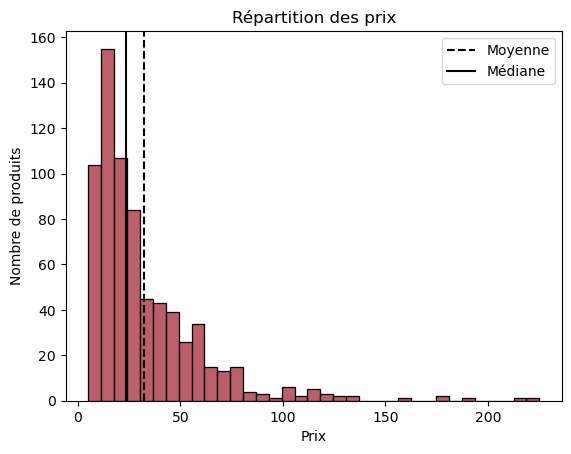

In [56]:
#Representation de la repartition des prix en histogramme:
#sns.histplot(data=df_merge_final["price"], color="#A72839")
sns.histplot(data=df_merge_final["price"], color="#A72839")

plt.axvline(moyenne, color="black", linestyle="--")
plt.axvline(mediane, color="black", linestyle="-")
plt.legend({"Moyenne":moyenne,"Médiane":mediane})
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")
plt.title("Répartition des prix")

Boxplot

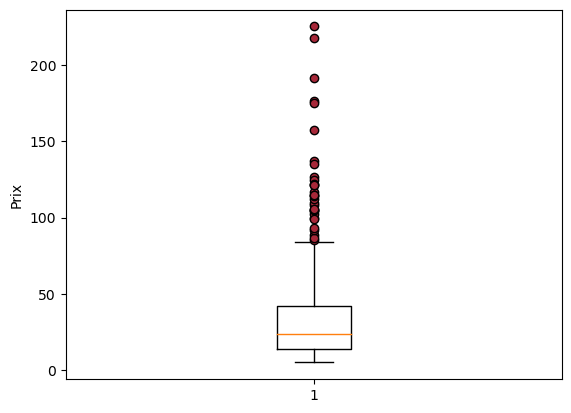

In [57]:
#boxplot = df_merge_final.boxplot(column=['price'], color="#A72839")

plt.boxplot(df_merge_final['price'], showfliers=True, flierprops={'markerfacecolor': '#A72839', 'marker': 'o'})
#plt.title("Méthode des interquartiles")
plt.ylabel("Prix")
plt.show()

Scatter plot

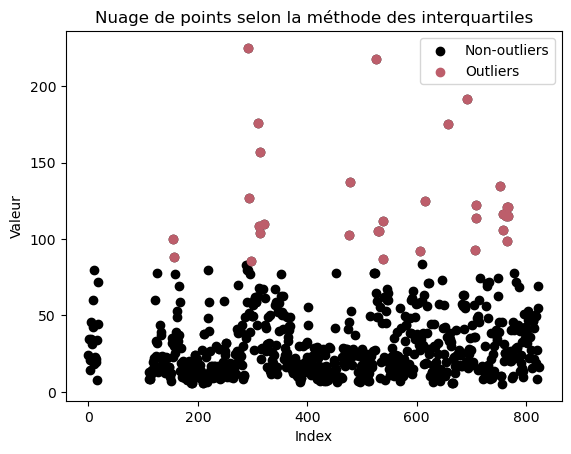

In [58]:
# On créé le scatter plot avec les données non outliers en noir
plt.scatter(df_merge_final.index, df_merge_final['price'], color="black", label="Non-outliers")

# On ajoute les outliers en rouge
plt.scatter(outliers_iq.index, outliers_iq['price'], color="#BD5E6B", label="Outliers")

# On personnalise le scatter plot
plt.xlabel("Index")
plt.ylabel("Valeur")
plt.title("Nuage de points selon la méthode des interquartiles")
plt.legend()

# On affiche le scatter plot
plt.show()

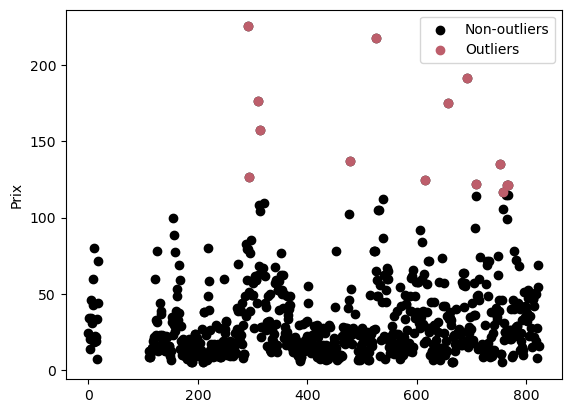

In [59]:
# On créé le scatter plot avec les données non outliers en noir
plt.scatter(df_merge_final.index, df_merge_final['price'], color="black", label="Non-outliers")

# On ajoute les outliers en rouge
plt.scatter(outliers_dn.index, outliers_dn['price'], color="#BD5E6B", label="Outliers")

# On personnalise le scatter plot
plt.ylabel("Prix")
plt.legend()

# On affiche le scatter plot
plt.show()